In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('laptops_10.csv', sep = ",", encoding="windows-1251")

In [11]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Cpu            1303 non-null   object 
 5   Ram            1303 non-null   object 
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float64
 9   Price_euros    1303 non-null   float64
 10  Cpu_Company    1303 non-null   object 
 11  Memory_Amount  1303 non-null   int64  
 12  Memory_Type    1303 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


#### 1.1 Изучите количество памяти с помощью matplotlib и hist


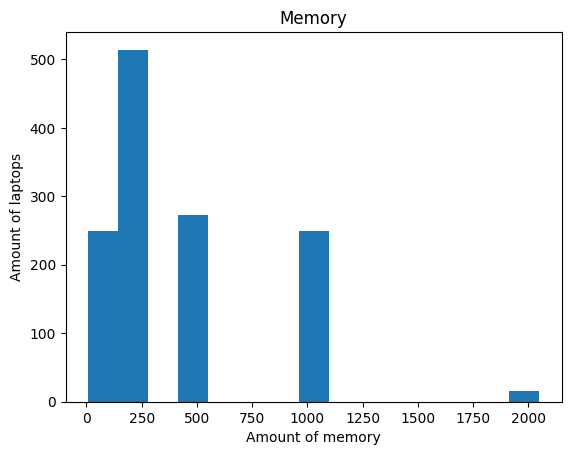

In [20]:
plt.hist(df['Memory_Amount'], bins=15)
plt.xlabel('Amount of memory')
plt.ylabel('Amount of laptops')
plt.title('Memory');

#### 1.2 Изучите стоимость ноутбуков с помощью matplotlib и hist

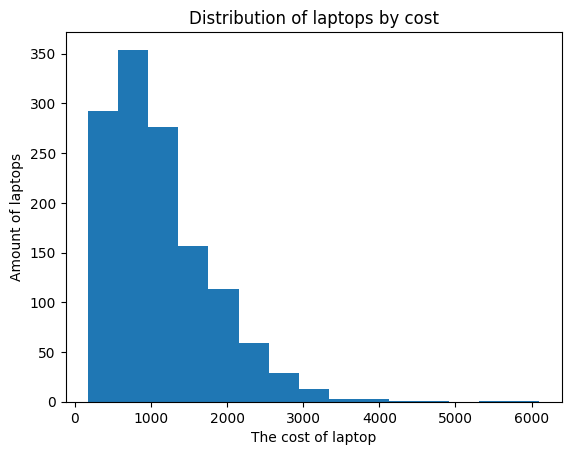

In [19]:
plt.hist(df['Price_euros'], bins=15)
plt.xlabel('The cost of laptop')
plt.ylabel('Amount of laptops')
plt.title('Distribution of laptops by cost');

#### 1.3 Изучите вес ноутбуков с помощью matplotlibи hist


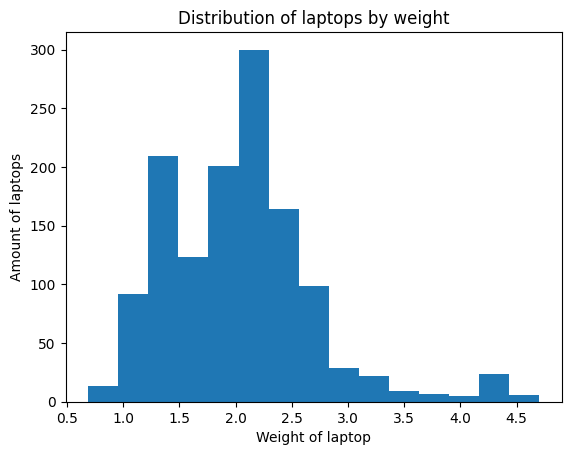

In [21]:
plt.hist(df['Weight'], bins=15)
plt.xlabel('Weight of laptop')
plt.ylabel('Amount of laptops')
plt.title('Distribution of laptops by weight');

##### 2.1 Изучите распределение типов носителя. Используем pie


In [22]:
df1 = df['Memory_Type'].value_counts()
df1

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

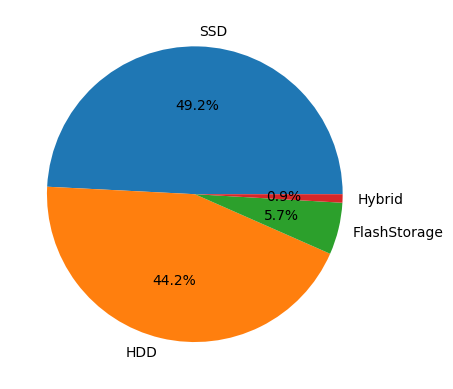

In [26]:
plt.pie(df1.values, labels=df1.index, autopct='%1.1f%%');

#### 2.2 Изучите распределение компаний производителей. Используем bar


In [27]:
df2 = df['Company'].value_counts()
df2

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

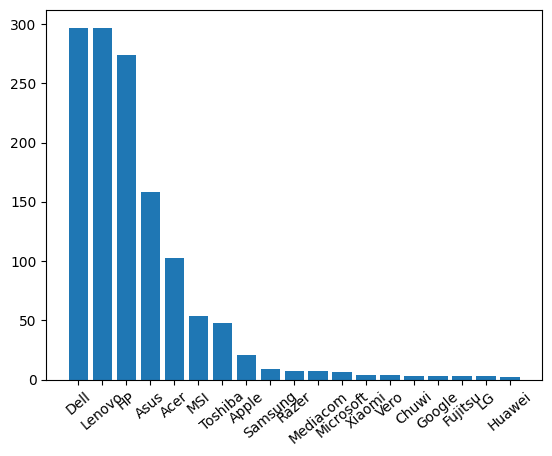

In [32]:
plt.bar(df2.index, df2.values)
plt.xticks(rotation= 40);

#### 2.3 Изучите распределение операционной системы. Используем bar


In [33]:
df3 = df['OpSys'].value_counts()
df3

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

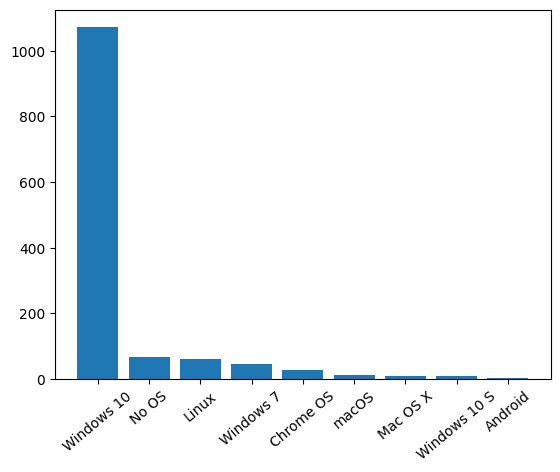

In [35]:
plt.bar(df3.index, df3.values)
plt.xticks(rotation= 40);

#### 2.4 Изучите распределение компаний производителей CPU. Используем pie

In [38]:
df4 = df['Cpu_Company'].value_counts()
df4

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

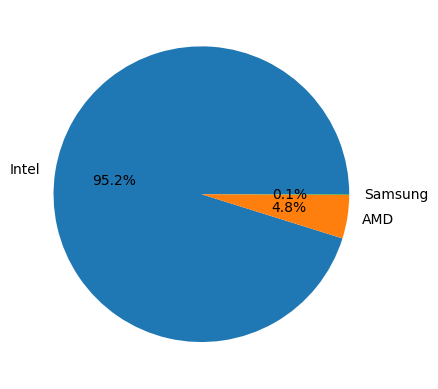

In [43]:
plt.pie(df4.values, labels=df4.index, autopct='%1.1f%%');

#### Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

##### 3.1 Постройте график в абсолютных величинах. Используем bar

In [49]:
df1 = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
df1.drop('Samsung', inplace=True, axis = 1)
df1 = df1.reset_index()
df1

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


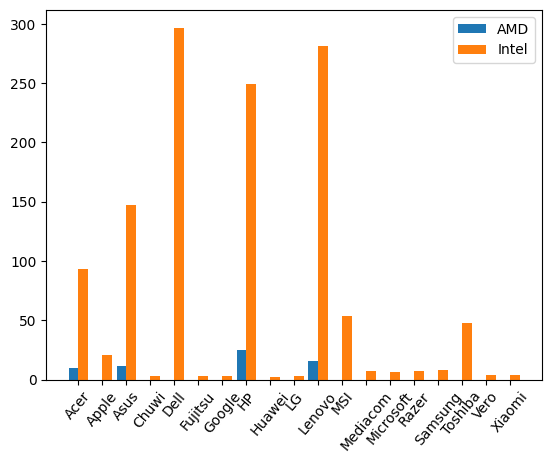

In [52]:
n_ticks = np.arange(len(df1['AMD']))
offset = 0.2
width = 0.4
plt.bar(n_ticks-offset, df1['AMD'], width = width)
plt.bar(n_ticks+offset, df1['Intel'], width = width)
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, df1['Company'], rotation=50);

##### 3.2 Постройте график в относительных величинах. Используем bar

In [53]:
df1 = pd.crosstab(index = df['Company'], columns=df['Cpu_Company'], normalize = 'index')
df1.drop('Samsung', inplace=True, axis=1)
df1 = df1.reset_index()
df1

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


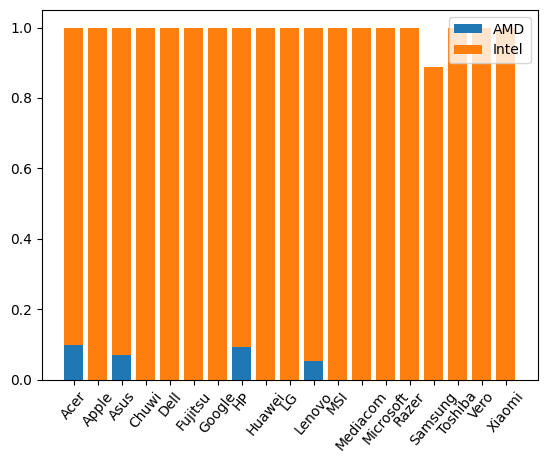

In [54]:
n_ticks = np.arange(len(df1['AMD']))

plt.bar( df1['Company'], df1['AMD'])
plt.bar(df1['Company'], df1['Intel'], bottom = df1['AMD'])
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, df1['Company'], rotation=50);

#### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора. Используем boxplot


c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


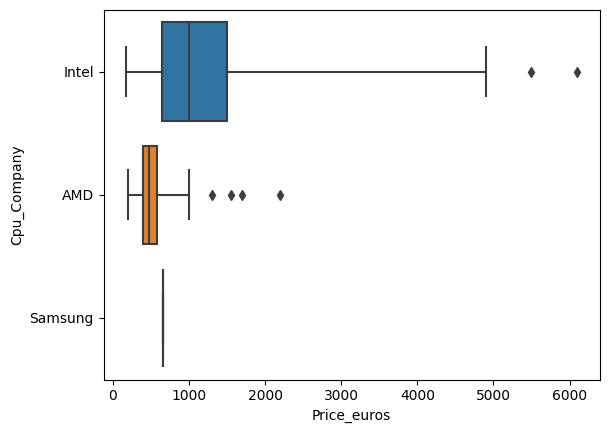

In [84]:
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], whis = 4);

#### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти. Используем boxplot


c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


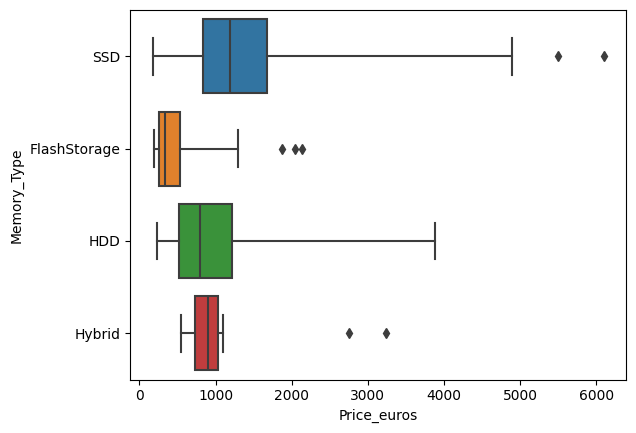

In [83]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis = 4);

#### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти. Используем boxplot


c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


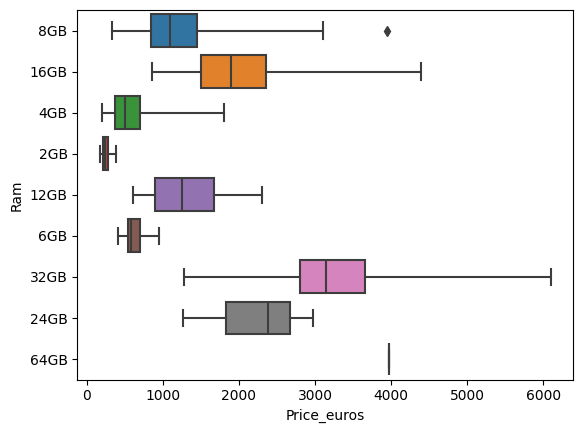

In [85]:
sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis = 4);

#### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя. Используем boxplot


c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Irishka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


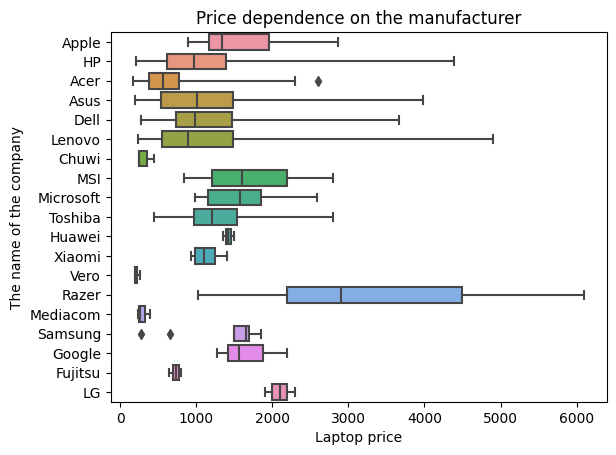

In [93]:
sns.boxplot(x=df['Price_euros'], y=df['Company'], whis = 4)
plt.xlabel('Laptop price')
plt.ylabel('The name of the company')
plt.title('Price dependence on the manufacturer');

#### Постройте матрицу корреляций для таблицы.
Используем heatmap

In [95]:
df5 = df[['Inches', 'Weight', 'Price_euros', 'Memory_Amount']]
df5

,Inches,Weight,Price_euros,Memory_Amount
0,13.3,1.37,1339.69,128
1,13.3,1.34,898.94,128
2,15.6,1.86,575.00,256
3,15.4,1.83,2537.45,512
4,13.3,1.37,1803.60,256
...,...,...,...,...
1298,14.0,1.80,638.00,128
1299,13.3,1.30,1499.00,512
1300,14.0,1.50,229.00,64
1301,15.6,2.19,764.00,1024


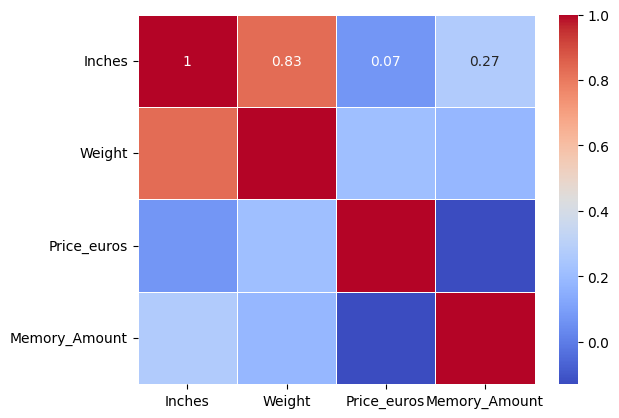

In [100]:
matr = round(df5.corr(), 2)
sns.heatmap(matr, annot = True, linewidths=.5, cmap='coolwarm');